In [3]:
import sys
import importlib

In [4]:
importlib.reload(sys)
#sys.setdefaultencoding('utf-8') 默认是utf8编码，Python3可以注释掉

<module 'sys' (built-in)>

In [5]:
import scrapy

In [6]:
class spider(scrapy.Spider):
    name = "pachong"#定义爬虫名称的字符串，必须是唯一的
    start_url = ['http://lab.scrapyd.cn']#爬虫需要选择的网址列表可以是多个
    def parse(self, response):
        pachong = response.css('div.quote')
        for v in pachong:
            text = v.css('.text::text').extract_first()
            author = v.css('.author::text').extract_first()
            tags = v.css('.tag .tag::text').extract()
            tag = ','.join(tags)
            filename = u'%s-语录.txt' % author
            with open(filename, "a+") as f:
                f.write(u'标题: '+ text)
                f.write('\n')
                f.write(u'标签: '+ tags)
                f.write('\n---------------------------------------------')
                f.close()
            next_page = response.css('li.next a::attr(href)').extract_first()
            if next_page is not None:
                next_page = response.urljoin(next_page)
                yield scrapy.Request(next_page, call_back=self.parse)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
mu = 100
sigma = 20
x = mu + sigma * np.random.randn(20000)  # 样本数量
plt.hist(x,bins=100,color='green',normed=True)   # bins显示有几个直方,normed是否对数据进行标准化
plt.show()

E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 640x480 with 1 Axes>

E:\Anaconda\lib\site-packages\matplotlib\__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


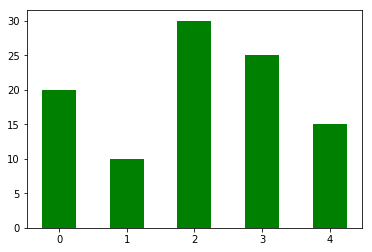

In [2]:
import matplotlib.pyplot as plt
import numpy as np
y = [20,10,30,25,15]
index = np.arange(5)
plt.bar(left=index, height=y, color='green', width=0.5)
plt.show()

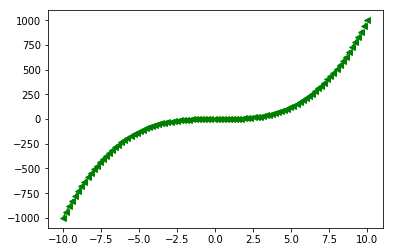

In [3]:

import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10,10,100)
y = x**3
plt.plot(x,y,linestyle='--',color='green',marker='<')
plt.show()

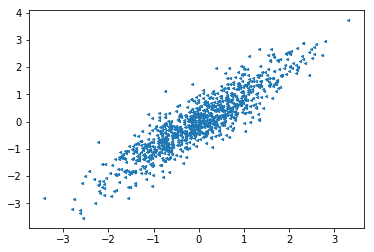

In [4]:
import matplotlib.pyplot as plt
import numpy as np
x = np.random.randn(1000)
y = x+np.random.randn(1000)*0.5
plt.scatter(x,y,s=5,marker='<')  # s表示面积，marker表示图形
plt.show()

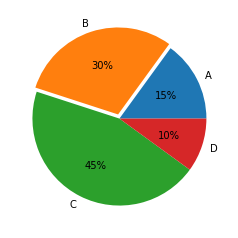

In [5]:
import matplotlib.pyplot as plt
import numpy as np
labels = 'A','B','C','D'
fracs = [15,30,45,10]
plt.axes(aspect=1)  #使x y轴比例相同
explode = [0,0.05,0,0]  # 突出某一部分区域
plt.pie(x=fracs, labels=labels, autopct='%.0f%%', explode=explode)  #autopct显示百分比
plt.show()

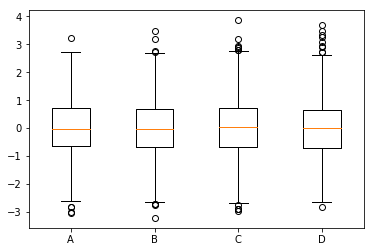

In [6]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(100)
data = np.random.normal(size=(1000,4),loc=0,scale=1)
labels = ['A','B','C','D']
plt.boxplot(data,labels=labels)
plt.show()

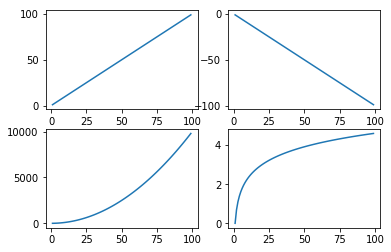

In [7]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(1,100)
plt.subplot(221)  # 2行2列第1个图
plt.plot(x,x)
plt.subplot(222)
plt.plot(x,-x)
plt.subplot(223)
plt.plot(x,x*x)
plt.subplot(224)
plt.plot(x,np.log(x))
plt.show()

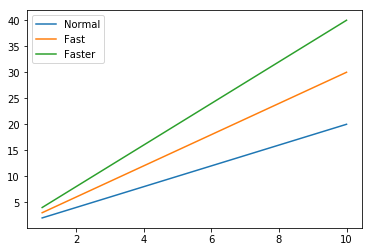

In [9]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(1,11,1)
plt.plot(x,x*2)
plt.plot(x,x*3)
plt.plot(x,x*4)
plt.legend(['Normal','Fast','Faster'])
plt.show()

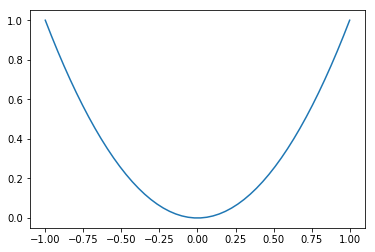

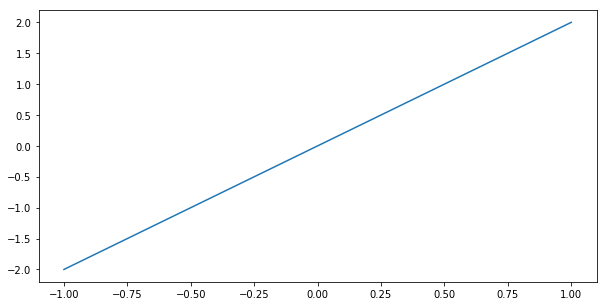

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1,1,50)
y1 = x ** 2 
y2 = x * 2
#这个是第一个figure对象,下面的内容都会在第一个figure中显示
plt.figure()
plt.plot(x,y1)
#这里第二个figure对象
plt.figure(num = 3,figsize = (10,5))
plt.plot(x,y2)
plt.show()

-----方式一-----


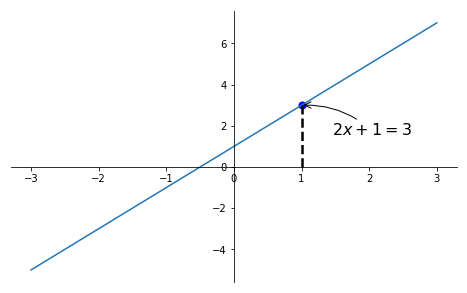

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3,50)
y = 2*x + 1

plt.figure(num = 1,figsize =(8,5))
plt.plot(x,y)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#将底下的作为x轴
ax.xaxis.set_ticks_position('bottom')
#并且data，以y轴的数据为基本
ax.spines['bottom'].set_position(('data',0))

#将左边的作为y轴
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

print("-----方式一-----")
x0 = 1
y0 = 2*x0 + 1
plt.plot([x0,x0],[0,y0],'k--',linewidth = 2.5)
plt.scatter([x0],[y0],s = 50,color='b')
plt.annotate(r'$2x+1 = %s$'% y0,xy = (x0,y0),xycoords = 'data',
             xytext=(+30,-30),textcoords = 'offset points',fontsize = 16
             ,arrowprops = dict(arrowstyle='->',
                                connectionstyle="arc3,rad=.2"))
plt.show()

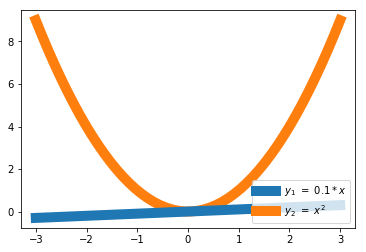

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3,50)
y1 = 0.1*x
y2 = x**2

plt.figure()
#zorder控制绘图顺序
plt.plot(x,y1,linewidth = 10,zorder = 2,label = r'$y_1\ =\ 0.1*x$')
plt.plot(x,y2,linewidth = 10,zorder = 1,label = r'$y_2\ =\ x^{2}$')

plt.legend(loc = 'lower right')

plt.show()

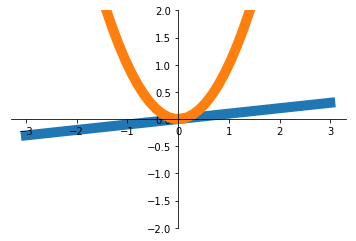

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3,50)
y1 = 0.1*x
y2 = x**2

plt.figure()
#zorder控制绘图顺序
plt.plot(x,y1,linewidth = 10,zorder = 1,label = r'$y_1\ =\ 0.1*x$')
plt.plot(x,y2,linewidth = 10,zorder = 2,label = r'$y_2\ =\ x^{2}$')

plt.ylim(-2,2)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.show()

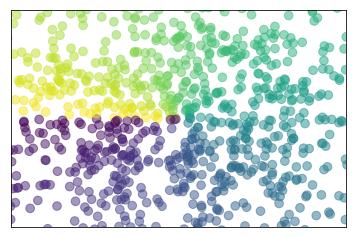

In [15]:
import matplotlib.pyplot as plt
import numpy as np

n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)#for color later on

plt.scatter(X,Y,s = 75,c = T,alpha = .5)

plt.xlim((-1.5,1.5))
plt.xticks([])#ignore xticks
plt.ylim((-1.5,1.5))
plt.yticks([])#ignore yticks
plt.show()

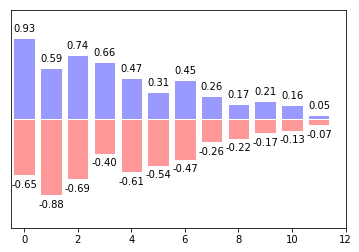

In [16]:
import matplotlib.pyplot as plt
import numpy as np

n = 12
X = np.arange(n)
Y1 = (1 - X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1 - X/float(n)) * np.random.uniform(0.5,1.0,n)
#facecolor:表面的颜色;edgecolor:边框的颜色
plt.bar(X,+Y1,facecolor = '#9999ff',edgecolor = 'white')
plt.bar(X,-Y2,facecolor = '#ff9999',edgecolor = 'white')
#描绘text在图表上
# plt.text(0 + 0.4, 0 + 0.05,"huhu")
for x,y in zip(X,Y1):
    #ha : horizontal alignment
    #va : vertical alignment
    plt.text(x + 0.01,y+0.05,'%.2f'%y,ha = 'center',va='bottom')

for x,y in zip(X,Y2):
    # ha : horizontal alignment
    # va : vertical alignment
    plt.text(x+0.01,-y-0.05,'%.2f'%(-y),ha='center',va='top')

plt.xlim(-.5,n)
plt.yticks([])
plt.ylim(-1.25,1.25)
plt.yticks([])
plt.show()

E:\Anaconda\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


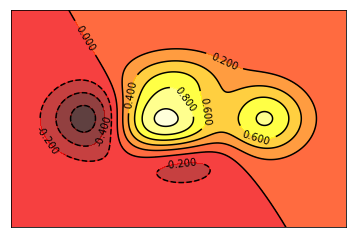

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
    #the height function
    return (1-x/2 + x**5+y**3) * np.exp(-x **2 -y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
#meshgrid函数用两个坐标轴上的点在平面上画网格。
X,Y = np.meshgrid(x,y)

#use plt.contourf to filling contours
#X Y and value for (X,Y) point
#这里的8就是说明等高线分成多少个部分，如果是0则分成2半
#则8是分成10半
#cmap找对应的颜色，如果高=0就找0对应的颜色值，
plt.contourf(X,Y,f(X,Y),8,alpha = .75,cmap = plt.cm.hot)

#use plt.contour to add contour lines
C = plt.contour(X,Y,f(X,Y),8,colors = 'black',linewidth = .5)

#adding label
plt.clabel(C,inline = True,fontsize = 10)

#ignore ticks
plt.xticks([])
plt.yticks([])

plt.show()

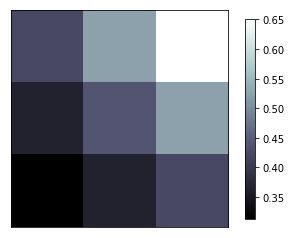

In [18]:
import matplotlib.pyplot as plt
import numpy as np

#image data
a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)

'''
for the value of "interpolation"，check this:
http://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html
for the value of "origin"= ['upper', 'lower'], check this:
http://matplotlib.org/examples/pylab_examples/image_origin.html
'''
#显示图像
#这里的cmap='bone'等价于plt.cm.bone
plt.imshow(a,interpolation = 'nearest',cmap = 'bone' ,origin = 'up')
#显示右边的栏
plt.colorbar(shrink = .92)

#ignore ticks
plt.xticks([])
plt.yticks([])

plt.show()

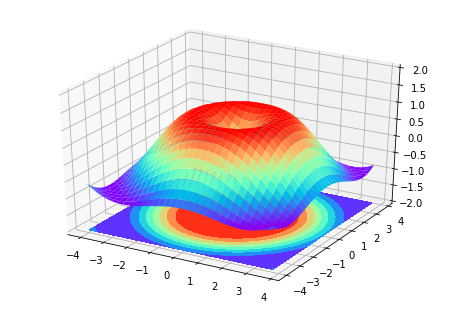

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
#X Y value
X = np.arange(-4,4,0.25)
Y = np.arange(-4,4,0.25)
X,Y = np.meshgrid(X,Y)
R = np.sqrt(X**2 + Y**2)
#hight value
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
"""
============= ================================================
        Argument      Description
        ============= ================================================
        *X*, *Y*, *Z* Data values as 2D arrays
        *rstride*     Array row stride (step size), defaults to 10
        *cstride*     Array column stride (step size), defaults to 10
        *color*       Color of the surface patches
        *cmap*        A colormap for the surface patches.
        *facecolors*  Face colors for the individual patches
        *norm*        An instance of Normalize to map values to colors
        *vmin*        Minimum value to map
        *vmax*        Maximum value to map
        *shade*       Whether to shade the facecolors
        ============= ================================================
"""

# I think this is different from plt12_contours
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.get_cmap('rainbow'))
"""
==========  ================================================
        Argument    Description
        ==========  ================================================
        *X*, *Y*,   Data values as numpy.arrays
        *Z*
        *zdir*      The direction to use: x, y or z (default)
        *offset*    If specified plot a projection of the filled contour
                    on this position in plane normal to zdir
        ==========  ================================================
"""
ax.set_zlim(-2, 2)
plt.show()


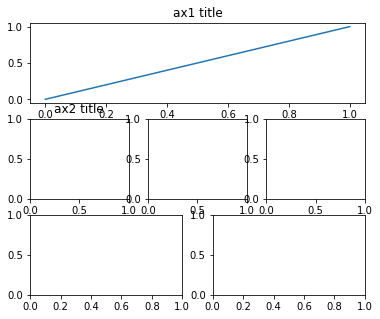

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,5))

ax1 = plt.subplot(3,1,1)
ax1.set_title("ax1 title")
plt.plot([0,1],[0,1])

#这种情况下如果再数的话以334为标准了，
#把上面的第一行看成是3个列
ax2 = plt.subplot(334)
ax2.set_title("ax2 title")

ax3 = plt.subplot(335)
ax4 = plt.subplot(336)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)

plt.show()

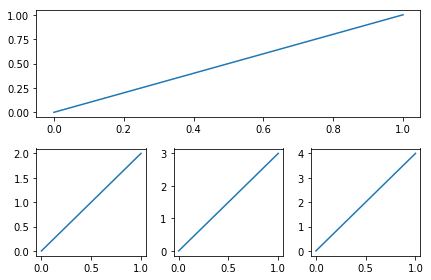

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,4))
#plt.subplot(n_rows,n_cols,plot_num)
plt.subplot(211)
# figure splits into 2 rows, 1 col, plot to the 1st sub-fig
plt.plot([0, 1], [0, 1])

plt.subplot(234)
# figure splits into 2 rows, 3 col, plot to the 4th sub-fig
plt.plot([0, 1], [0, 2])

plt.subplot(235)
# figure splits into 2 rows, 3 col, plot to the 5th sub-fig
plt.plot([0, 1], [0, 3])

plt.subplot(236)
# figure splits into 2 rows, 3 col, plot to the 6th sub-fig
plt.plot([0, 1], [0, 4])

plt.tight_layout()
plt.show()

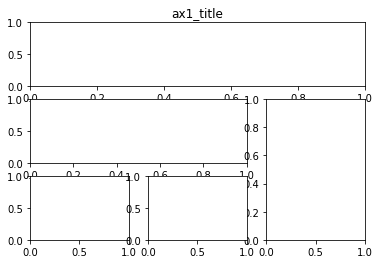

In [22]:
#method 1: subplot2grid
import matplotlib.pyplot as plt
plt.figure()
#第一个参数shape也就是我们网格的形状
#第二个参数loc,位置,这里需要注意位置是从0开始索引的
#第三个参数colspan跨多少列,默认是1
#第四个参数rowspan跨多少行,默认是1
ax1 = plt.subplot2grid((3,3),(0,0),colspan = 3,rowspan = 1)
#如果为他设置一些属性的话，如plt.title,则用ax1的话
#ax1.set_title(),同理可设置其他属性
ax1.set_title("ax1_title")

ax2 = plt.subplot2grid((3,3),(1,0),colspan = 2,rowspan = 1)
ax3 = plt.subplot2grid((3,3),(1,2),colspan = 1,rowspan = 2)
ax4 = plt.subplot2grid((3,3),(2,0),colspan = 1,rowspan = 1)
ax5 = plt.subplot2grid((3,3),(2,1),colspan = 1,rowspan = 1)

plt.show()

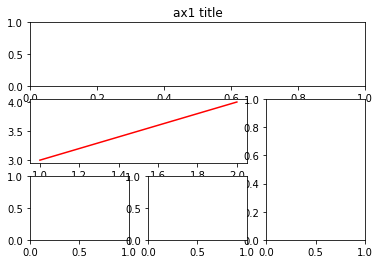

In [23]:
#method 2:gridspec
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure()
gs = gridspec.GridSpec(3,3)
#use index from 0
ax1 = plt.subplot(gs[0,:])
ax1.set_title("ax1 title")

ax2 = plt.subplot(gs[1,:2])
ax2.plot([1,2],[3,4],'r')

ax3 = plt.subplot(gs[1:,2:])
ax4 = plt.subplot(gs[-1,0])
ax5 = plt.subplot(gs[-1,-2])

plt.show()

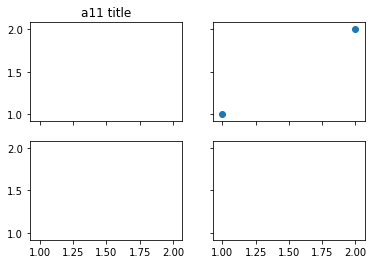

In [24]:
#method 3 :easy to define structure
#这种方式不能生成指定跨行列的那种
import matplotlib.pyplot as plt
#(ax11,ax12),(ax13,ax14)代表了两行
#f就是figure对象,
#sharex：是否共享x轴
#sharey:是否共享y轴
f,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,sharex = True,sharey = True)
ax11.set_title("a11 title")
ax12.scatter([1,2],[1,2])

plt.show()


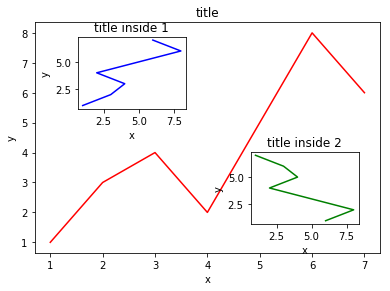

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure()
x = [1,2,3,4,5,6,7]
y = [1,3,4,2,5,8,6]

#below are all percentage
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
#使用plt.figure()显示的是一个空的figure
#如果使用fig.add_axes会添加轴
ax1 = fig.add_axes([left, bottom, width, height])# main axes
ax1.plot(x,y,'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('title')

ax2 = fig.add_axes([0.2, 0.6, 0.25, 0.25])  # inside axes
ax2.plot(y, x, 'b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('title inside 1')

# different method to add axes
####################################
plt.axes([0.6, 0.2, 0.25, 0.25])
plt.plot(y[::-1], x, 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title inside 2')

plt.show()

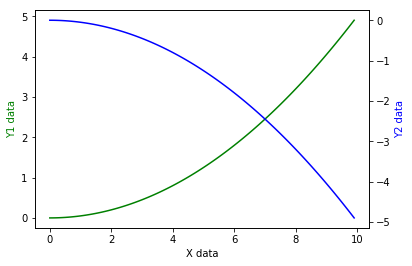

In [26]:
# 使用twinx是添加y轴的坐标轴
# 使用twiny是添加x轴的坐标轴
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,10,0.1)
y1 = 0.05 * x ** 2
y2 = -1 * y1

fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x,y1,'g-')
ax2.plot(x,y2,'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data',color = 'g')
ax2.set_ylabel('Y2 data',color = 'b')

plt.show()

<IPython.core.display.Javascript object>


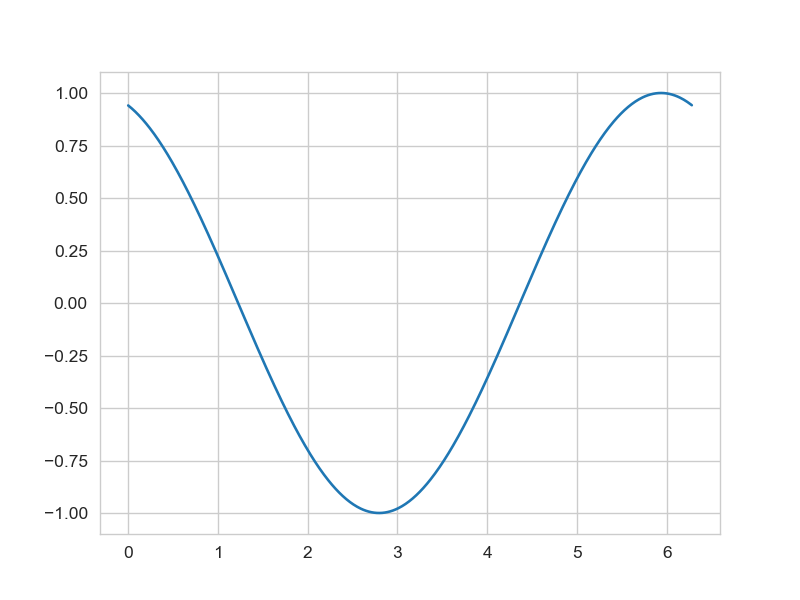

In [31]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

fig,ax = plt.subplots()

x = np.arange(0,2*np.pi,0.01)
#因为这里返回的是一个列表，但是我们只想要第一个值
#所以这里需要加,号
line, = ax.plot(x,np.sin(x))

def animate(i):
    line.set_ydata(np.sin(x + i/10.0))#updata the data
    return line,

def init():
    line.set_ydata(np.sin(x))
    return line,


# call the animator.  blit=True means only re-draw the parts that have changed.
# blit=True dose not work on Mac, set blit=False
# interval= update frequency
#frames帧数
ani = animation.FuncAnimation(fig=fig, func=animate, frames=100, init_func=init,
                              interval=20, blit=False)

plt.show()